# Exploratory Data Analysis 

In [249]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

## Traitement du fichier

### Chargement du fichier

In [250]:
filename = "Demandeurs d’emploi inscrits en fin de mois à Pôle emploi par Comune.csv"

data = pd.read_csv(filename,
                   sep=";",
                   skiprows=3,
                   engine='python',
                   skipfooter=1)
# On va supprimer la dernère la colonnes des communes de moins 500 habs
data = data.iloc[:,0:25]

data = data.applymap(lambda x: x.replace(" ",""))

### Standardisation des dates

In [251]:
new_months = pd.date_range(start="07-2016", end="01-2023",name = "Mois",freq="M",inclusive="both")

### Standardisation des codes postaux 

In [252]:
# Expression régulière pour isoler les codes postaux
# D'abord on a besoin d'isoler les cp
# Ensuite on isole les données

all_but_first = data.columns != "Mois"
data.columns[all_but_first]
def keep_only_cp(x):
    return re.search("\d{5}",x).group(0)

cp_standard = [keep_only_cp(column) for column in data.columns[all_but_first]]

In [253]:
new_data = pd.DataFrame(data.iloc[:,all_but_first].values,new_months)
new_data.columns = cp_standard
x = new_data.astype('int32')

,code postal,mois,inscrits
1092,97438,2016-07-31,6080
1093,97438,2016-08-31,6160
1094,97438,2016-09-30,6100
1095,97438,2016-10-31,6020
1096,97438,2016-11-30,6060
1097,97438,2016-12-31,6010
1098,97438,2017-01-31,6050
1099,97438,2017-02-28,6060
1100,97438,2017-03-31,6020
1101,97438,2017-04-30,5950


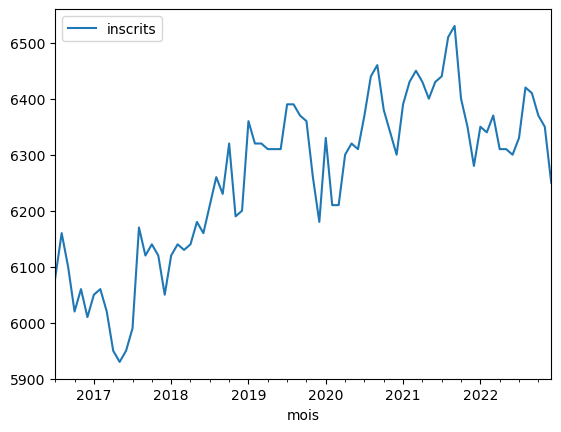

In [283]:
new_data = pd.DataFrame({
    "code postal" : np.repeat(x.columns, x.shape[0]),
    "mois" : pd.concat([
        pd.Series(x.index) for i in range(x.shape[1])
        ]).to_numpy(),
    "inscrits" : np.reshape(x.to_numpy(),x.shape[0]*x.shape[1],order= "F")
})

stemarie = new_data["code postal"] == "97438"
new_data.loc[stemarie,:].plot(y = "inscrits",x = "mois")

new_data.loc[stemarie,:].head(50)


,code postal,mois,inscrits
0,97412,2016-07-31,2510
1,97412,2016-08-31,1710
2,97412,2016-09-30,1440
3,97412,2016-10-31,1180
4,97412,2016-11-30,5690
...,...,...,...
1867,97433,2022-08-31,12240
1868,97433,2022-09-30,20510
1869,97433,2022-10-31,1280
1870,97433,2022-11-30,18850


In [265]:
pd.concat[pd.Series((x.index)) for i in range(x.shape[1])]

SyntaxError: invalid syntax (1387943002.py, line 1)